# Introducción

# Selección de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
#dataset descargado de Kaggle
train = pd.read_csv('train.csv')

In [4]:
test = pd.read_csv('test.csv')

In [5]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


# Preprocesamiento/Limpieza de datos

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

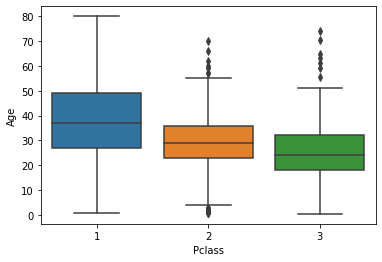

In [9]:
sns.boxplot(x='Pclass',y='Age', data=train)

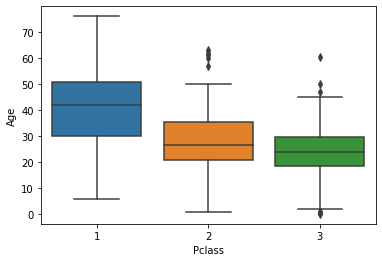

In [10]:
sns.boxplot(x='Pclass',y='Age', data=test)

In [11]:
def nuevo_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):
        
        if Pclass==1:
            return 39
        elif Pclass ==2:
            return 28
        else:
            return 23
    else:
        return Age

In [12]:
train['Age'] = train[['Age','Pclass']].apply(nuevo_age,axis=1) 

In [13]:
test['Age'] = test[['Age','Pclass']].apply(nuevo_age,axis=1) 

In [14]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [16]:
train.drop('Cabin',axis=1,inplace=True)

In [17]:
test.drop('Cabin',axis=1,inplace=True)

In [18]:
train.dropna(inplace=True)

In [19]:
test.dropna(inplace=True)

In [20]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [21]:
test.isnull().sum()

PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [22]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Name         889 non-null    object 
 4   Sex          889 non-null    object 
 5   Age          889 non-null    float64
 6   SibSp        889 non-null    int64  
 7   Parch        889 non-null    int64  
 8   Ticket       889 non-null    object 
 9   Fare         889 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.3+ KB


In [23]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 417 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  417 non-null    int64  
 1   Pclass       417 non-null    int64  
 2   Name         417 non-null    object 
 3   Sex          417 non-null    object 
 4   Age          417 non-null    float64
 5   SibSp        417 non-null    int64  
 6   Parch        417 non-null    int64  
 7   Ticket       417 non-null    object 
 8   Fare         417 non-null    float64
 9   Embarked     417 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 35.8+ KB


In [24]:
train_sex = pd.get_dummies(train['Sex'],drop_first=True)

In [25]:
test_sex = pd.get_dummies(test['Sex'],drop_first=True)

In [26]:
train_sex

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [27]:
test_sex

,male
0,1
1,0
2,1
3,1
4,0
...,...
413,1
414,0
415,1
416,1


In [28]:
train_embark = pd.get_dummies(train['Embarked'], drop_first=False)

In [29]:
test_embark = pd.get_dummies(test['Embarked'], drop_first=False)

In [30]:
train_embark

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [31]:
test_embark

,C,Q,S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1
...,...,...,...
413,0,0,1
414,1,0,0
415,0,0,1
416,0,0,1


# Transformación/Reducción de datos

In [32]:
train.drop(['Sex','Embarked','Name', 'Ticket','PassengerId','Fare'],axis=1,inplace=True)

In [33]:
train = pd.concat([train,train_sex,train_embark], axis=1)

In [34]:
test.drop(['Sex','Embarked','Name', 'Ticket','Fare'],axis=1,inplace=True)

In [35]:
test = pd.concat([test,test_sex,test_embark], axis=1)

In [36]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,male,C,Q,S
0,0,3,22.0,1,0,1,0,0,1
1,1,1,38.0,1,0,0,1,0,0
2,1,3,26.0,0,0,0,0,0,1
3,1,1,35.0,1,0,0,0,0,1
4,0,3,35.0,0,0,1,0,0,1


In [37]:
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,male,C,Q,S
0,892,3,34.5,0,0,1,0,1,0
1,893,3,47.0,1,0,0,0,0,1
2,894,2,62.0,0,0,1,0,1,0
3,895,3,27.0,0,0,1,0,0,1
4,896,3,22.0,1,1,0,0,0,1


In [38]:
X = train.drop('Survived',axis=1)
y = train['Survived']

In [39]:
id=test['PassengerId']

# Minería de datos

In [40]:
from sklearn.linear_model import LogisticRegression
reglog = LogisticRegression()
reglog.fit(X,y)
reglog_predict=reglog.predict(test.drop('PassengerId',axis=1))
reglog_resultado= pd.DataFrame({'PassengerId':id,'Survived':reglog_predict})
reglog_score=reglog.score(X,y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [41]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(X,y)
svc_predict=svc.predict(test.drop('PassengerId',axis=1))
svc_resultado= pd.DataFrame({'PassengerId':id,'Survived':svc_predict})
svc_score=svc.score(X,y)

In [42]:
from sklearn.neighbors import KNeighborsClassifier
kn=KNeighborsClassifier()
kn.fit(X,y)
kn_predict=kn.predict(test.drop('PassengerId',axis=1))
kn_resultado= pd.DataFrame({'PassengerId':id,'Survived':kn_predict})
kn_score=kn.score(X,y)

In [43]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X, y)
rfc_predict=rfc.predict(test.drop('PassengerId',axis=1))
rfc_resultado= pd.DataFrame({'PassengerId':id,'Survived':rfc_predict})
rfc_score=rfc.score(X,y)

# Interpretación/Evaluación

In [44]:
print ('Regresión Lineal:',reglog_score)
print ('Vectores de soporte:',svc_score )
print ('Vecinos próximos',kn_score )
print ('Bosque aleatorio',rfc_score)

Regresión Lineal: 0.8053993250843644
Vectores de soporte: 0.6400449943757031
Vecinos próximos 0.8492688413948256
Bosque aleatorio 0.937007874015748


In [45]:
reglog_resultado

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [46]:
svc_resultado

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,0
415,1307,0
416,1308,0


In [47]:
kn_resultado

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [48]:
rfc_resultado

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,1
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0
